In [1]:
import matplotlib.pyplot as plt
import boost_histogram as bh

from plothist.plotters import make_hist
from plothist.plotters import plot_hist
from plothist.plotters import plot_error_hist
from plothist.plotters import plot_hist_difference
from plothist.plotters import cubehelix_palette
from plothist.generate_dummy_data import generate_dummy_data

In [2]:
# Generate dummy data
df = generate_dummy_data()
df.head()

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,category
0,3.161042,0.626421,-0.315482,-2.264888,-5.781431,-3.406428,1.759432,1.146277,3.047033,1.442019,2
1,-0.181271,-3.567424,2.257261,-0.449406,-4.044520,-0.892859,1.510282,1.462701,-2.730473,3.381304,4
2,-2.291207,-2.257079,-2.195531,-1.726600,-3.583056,-3.436460,-2.698386,1.111759,1.378220,-0.169138,6
3,2.080979,-1.865050,2.895760,-3.415163,-4.098792,3.783088,0.757920,-3.674254,2.831025,0.668761,2
4,-2.468859,-3.788331,2.821014,0.965556,-3.902289,-2.797187,2.484887,0.164317,-1.315192,1.629387,4


# I How to plot multiple data categories

Text(0, 0.5, 'Entries')

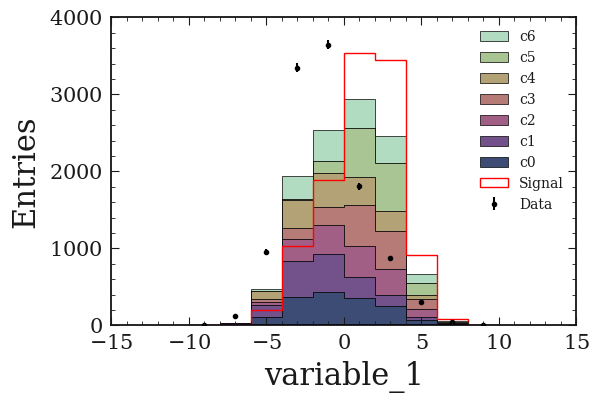

In [3]:
key = "variable_1"
range = [-10, 10]
category = "category"

# Define masks

unstacked_mask = df[category] == 7
error_mask = df[category] == 8

stacked_categories = [0, 1, 2, 3, 4, 5, 6]
stacked_categories_labels = [f"c{i}" for i in stacked_categories]
stacked_categories_colors = cubehelix_palette(
    ncolors=len(stacked_categories),
    start=1.5,
    rotation=1.5,
    darkest=0.3,
    lightest=0.8,
    reverse=True,
)
stacked_masks = [df[category] == p for p in stacked_categories]

# Make histograms

error_hist = make_hist(df[key][error_mask], bins=10, range=range, weights=1)
stacked_hist = [
    make_hist(df[key][mask], bins=10, range=range, weights=1) for mask in stacked_masks
]
unstacked_hist = make_hist(df[key][unstacked_mask], bins=10, range=range, weights=1)

# Optional: normalisation to error_data

stacked_hist_scaling_factor = error_hist.sum().value / sum(stacked_hist).sum().value
stacked_hist = [stacked_hist_scaling_factor * h for h in stacked_hist]

unstacked_hist_scaling_factor = error_hist.sum().value / unstacked_hist.sum().value
unstacked_hist *= unstacked_hist_scaling_factor

# Plot the histograms

fig, ax = plt.subplots()

plot_hist(
    stacked_hist,
    ax=ax,
    stacked=True,
    color=stacked_categories_colors,
    label=stacked_categories_labels,
    edgecolor="black",
    histtype="stepfilled",
    linewidth=0.5,
)
plot_hist(
    unstacked_hist, ax=ax, stacked=False, color="red", label="Signal", histtype="step"
)
plot_error_hist(error_hist, ax=ax, color="black", label="Data")

ax.legend(ncol=1, framealpha=0.1, fontsize=10)

ax.set_xlabel(key)
ax.set_ylabel("Entries")

# Optional: save the figure
# fig.savefig('test.pdf', bbox_inches='tight')

# II Plot histogram difference

Text(0, 0.5, 'Difference')

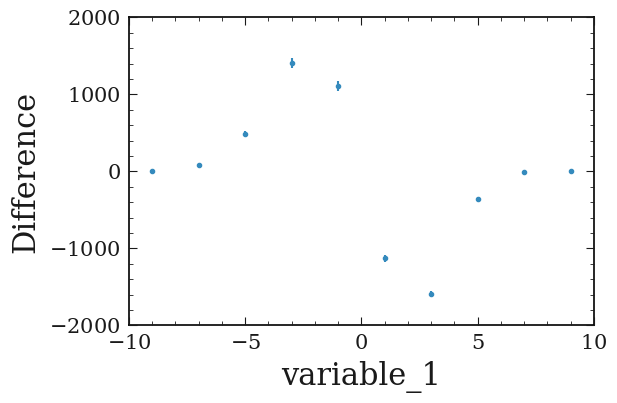

In [4]:
fig, ax = plt.subplots()
plot_hist_difference(error_hist, sum(stacked_hist), ax)
ax.set_xlabel(key)
ax.set_ylabel("Difference")